In [1]:
from model import get_model

model = get_model('resnet50', 'imagenet', 'standard', '../models/imagenet_r50_train.pt')
model

Loading ResNet50 Model
Standard ResNet50 Loaded Successfully


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [53]:
from attacks import prepare_attack

attack_params = {
  'attack_type': 'L2_PGD',
  'epsilon': 5,
  'iterations': 20,
}

fmodel, attack = prepare_attack(model, attack_params)

c:\Niranjan\Ashoka\Research\robust_CAMs\robustCAMs\lib\site-packages\foolbox\models\pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


In [16]:
# output image
import PIL
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

data_path = "../data/dummy_imagenet"

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

ds = datasets.ImageFolder(data_path, transform=transform)
dl = DataLoader(ds, batch_size=1, shuffle=True)

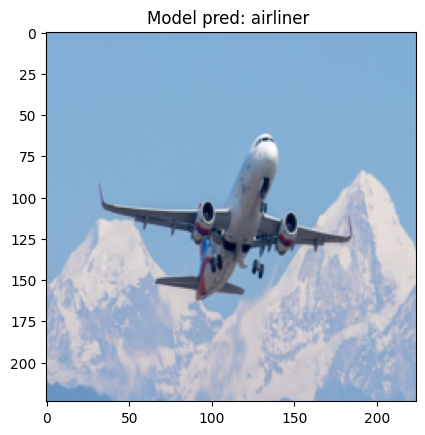

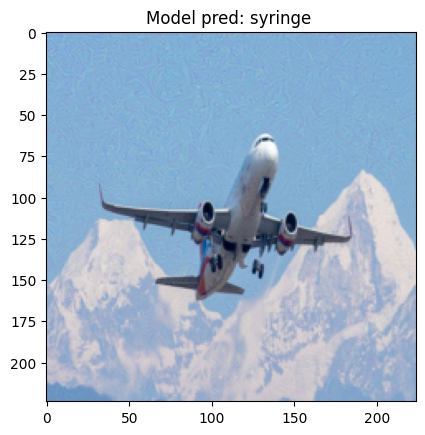

In [61]:
img, label = next(iter(dl))
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import foolbox as fb
from imagenet_utils import get_class_label

# show image
plt.imshow(np.transpose(img[0].numpy(), (1, 2, 0)))
pred = model(img).argmax(dim=1)
plt.title(f"Model pred: {get_class_label(pred.item())} ")
plt.show()

# attack image
# criterion = fb.criteria.Misclassification(labels=label)
img_adv, _, succ  = attack(fmodel, img, label, epsilons=[attack_params['epsilon']])
plt.imshow(np.transpose(img_adv[0][0].numpy(), (1, 2, 0)))
pred = model(img_adv[0]).argmax(dim=1)
plt.title(f"Model pred: {get_class_label(pred.item())} ")
plt.show()


In [60]:
img.shape

torch.Size([1, 3, 224, 224])

In [34]:
pred = model(img_adv[0])
pred_ind = pred.argmax(dim=1)

get_class_label(pred_ind.item())


'Walker hound, Walker foxhound'